# Resolvendo Equações diferenciais parciais numericamente

In [359]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [362]:
# Função que gera a grade e o ponto onde a gota pingou
def create_grid(L):
    xy = np.full((L,L),0)
    xy[int(L/2),int(L/2)] = 1
    return xy

In [361]:
# Ajuste das condições de contorno xy[contorno] = 0
def contorno(xy,L):
    xy[:,0] = 0; xy[:,-1] = 0; xy[0,:] = 0; xy[-1,:] = 0;
    return xy

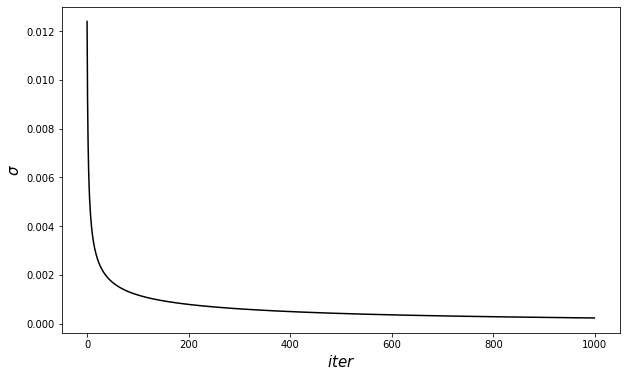

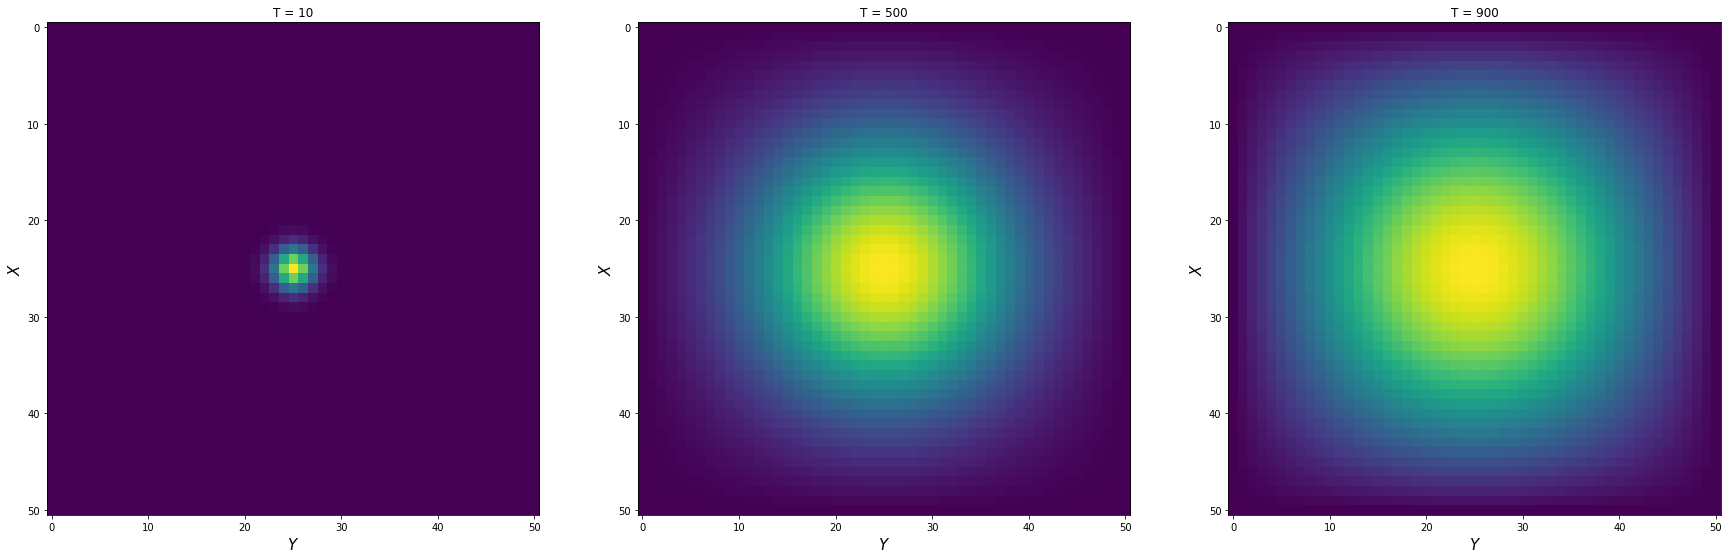

In [377]:
D = 1
dt = 0.1
niter = 1000
L = 51

data = []; 
grid = create_grid(L)
std = np.zeros(niter)

for i in range(niter):
    grid = grid + D*(np.roll(grid, +1 ,axis = 0) + np.roll(grid, -1, axis = 0) + np.roll(grid, +1, axis = 1) + np.roll(grid, -1, axis = 1) - 4*grid)*dt
    grid = contorno(grid,L)
    data.append(grid)
    std[i] = grid.std()

fig,axs = plt.subplots(figsize = (10,6))

axs.set_ylabel(r'$\sigma$', fontsize = 15)
axs.set_xlabel(r'$iter$', fontsize = 15)
axs.plot(np.arange(0,niter), std, color = 'black')
plt.show(True)


fig,axs = plt.subplots(1,3,figsize = (30,10))

T = [10, 500, 900]

for ax,iT in zip(axs.flat,T):
    ax.imshow(data[iT])
    ax.set_ylabel(r'$X$', fontsize = 15)
    ax.set_xlabel(r'$Y$', fontsize = 15)
    ax.set_title('T = {}'.format(iT))
plt.show(True)


### Criando animação

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


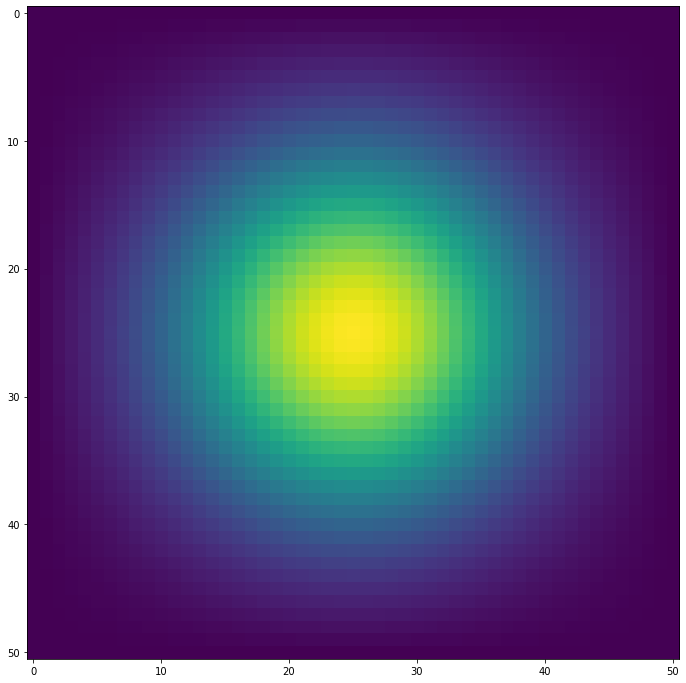

In [379]:
from celluloid import Camera
D = 1
dt = 0.1
niter = 500
L = 51

fig, ax = plt.subplots(figsize = (12,12))
camera = Camera(fig)

data = []; figs = []
grid = create_grid(L)
std = np.zeros(niter)
for i in range(niter):
    grid = grid + D*(np.roll(grid, +1 ,axis = 0) + np.roll(grid, -1, axis = 0) + np.roll(grid, +1, axis = 1) + np.roll(grid, -1, axis = 1) - 4*grid)*dt
    grid = contorno(grid,L)
    data.append(grid)
    std[i] = grid.std()
    ax.imshow(grid)
    camera.snap() 
    
animation = camera.animate(interval = 25) 
animation.save('fig-L1.gif')
plt.imshow(grid)
plt.show()

## Gray Scott simulation

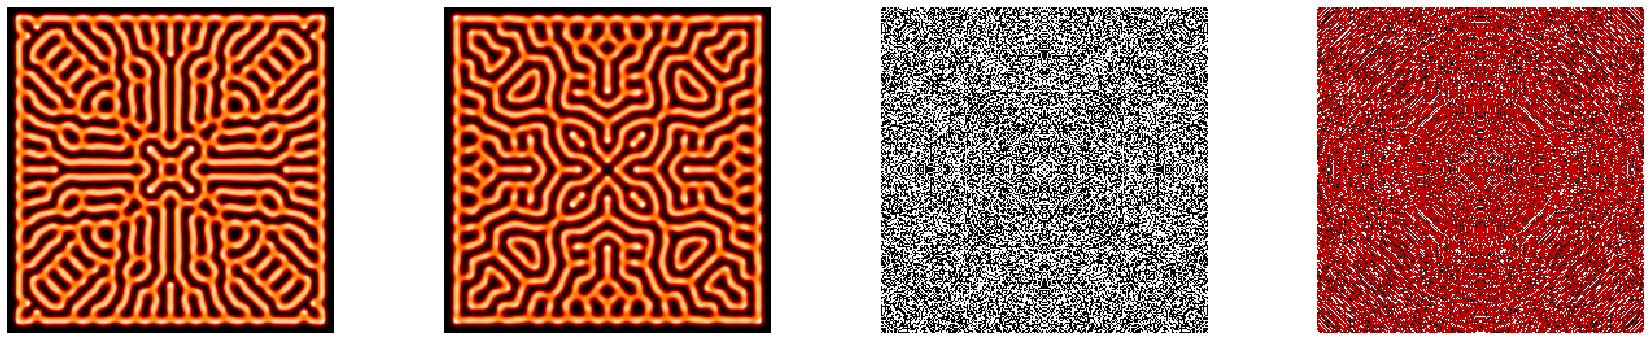

In [403]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
Fs = [0.04,0.03,0.22,0.11]
ks = [0.06,0.057,0.05,0.37]
fig, axs = plt.subplots(1,4, figsize = (30,6))
for F,k,ax in zip(Fs,ks, axs.flat):
    def du_dt(f):
        df = Du*convolve2d(f, maske, mode="same") - v*v*u + F*(1.0 - u)
        return df

    def dv_dt(f):
        df = Dv*convolve2d(f, maske, mode="same") + v*v*u - (F+k)*v
        return df

    maske = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])


    #parameters setting
    #F = 0.02                #feed rate
    #k = 0.052               #kill rate

    Du, Dv = 0.16, 0.08     #diffusion coefficients
    L = 252                 #fig dimention

    u = np.zeros((L, L))
    u2 = np.zeros((L, L))
    v = np.zeros((L, L))
    v2 = np.zeros((L, L))

    #initial condition
    u[L//2-6:L//2+6, L//2-6:L//2+6] = 1.0
    v[L//2-3:L//2+3, L//2-3:L//2+3] = 1.0

    iterations = 10000      #number of iterarion 
    dt = 1.0                #step
    for i in range(iterations):
        if i % 2 == 0:
            u2[:] = u + du_dt(u)* dt
            v2[:] = v + dv_dt(v)* dt
        else:
            u[:] = u2 + du_dt(u2)* dt
            v[:] = v2 + dv_dt(v2)* dt


    #show the image
    ax.imshow(v, cmap= 'gist_heat')
    ax.set_axis_off()